In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
#Step 1 ---> Data Collection and Preprocessing

df = pd.read_csv('data/employee_data.csv')
df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [7]:
df.isnull().sum() #will show the number of null values in each column
df = df.drop_duplicates() #will drop the duplicated rows

# Standardize categorical values
df["Attrition"] = df["Attrition"].str.strip().str.capitalize()
df["Department"] = df["Department"].str.strip().str.title()

df.info() #final data overview



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [8]:
# Step 2 ---> Exploratory Data Analysis

df.describe()

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.570000,72820.000000,10.800000,84.940000
std,29.011492,8.318478,12643.823102,6.361183,6.349771
min,1.000000,25.000000,43000.000000,1.000000,70.000000
25%,25.750000,29.750000,65000.000000,5.000000,80.000000
50%,50.500000,35.000000,72000.000000,10.000000,85.500000
75%,75.250000,41.250000,82750.000000,16.000000,90.000000
max,100.000000,60.000000,95000.000000,25.000000,95.000000


In [9]:
# Mean , Median and Mode
print("Mean Values:")
mean = df.mean(numeric_only=True) #mean of numeric columns in the dataset
print(mean,"\n")

print("Median Values:")
median = df.median(numeric_only=True) #median of numeric columns in the dataset
print(median, "\n")

print("Mode Values:")
mode = df.mode().iloc[0] # mode of numberic columns in the dataset
print(mode)


Mean Values:
EmployeeID             50.50
Age                    36.57
Salary              72820.00
YearsAtCompany         10.80
PerformanceScore       84.94
dtype: float64 

Median Values:
EmployeeID             50.5
Age                    35.0
Salary              72000.0
YearsAtCompany         10.0
PerformanceScore       85.5
dtype: float64 

Mode Values:
EmployeeID                     1
Name                James Walker
Age                         29.0
Department           Engineering
Salary                   68000.0
YearsAtCompany               2.0
PerformanceScore            80.0
Attrition                     No
Name: 0, dtype: object


In [10]:
# Variance and Standard Deviation
print("\nVariance:")
print(df.var(numeric_only=True)) #variance of numeric columns in the dataset

print("\nStandard Deviation:")
print(df.std(numeric_only=True)) #standard deviation of numeric columns in the dataset



Variance:
EmployeeID          8.416667e+02
Age                 6.919707e+01
Salary              1.598663e+08
YearsAtCompany      4.046465e+01
PerformanceScore    4.031960e+01
dtype: float64

Standard Deviation:
EmployeeID             29.011492
Age                     8.318478
Salary              12643.823102
YearsAtCompany          6.361183
PerformanceScore        6.349771
dtype: float64


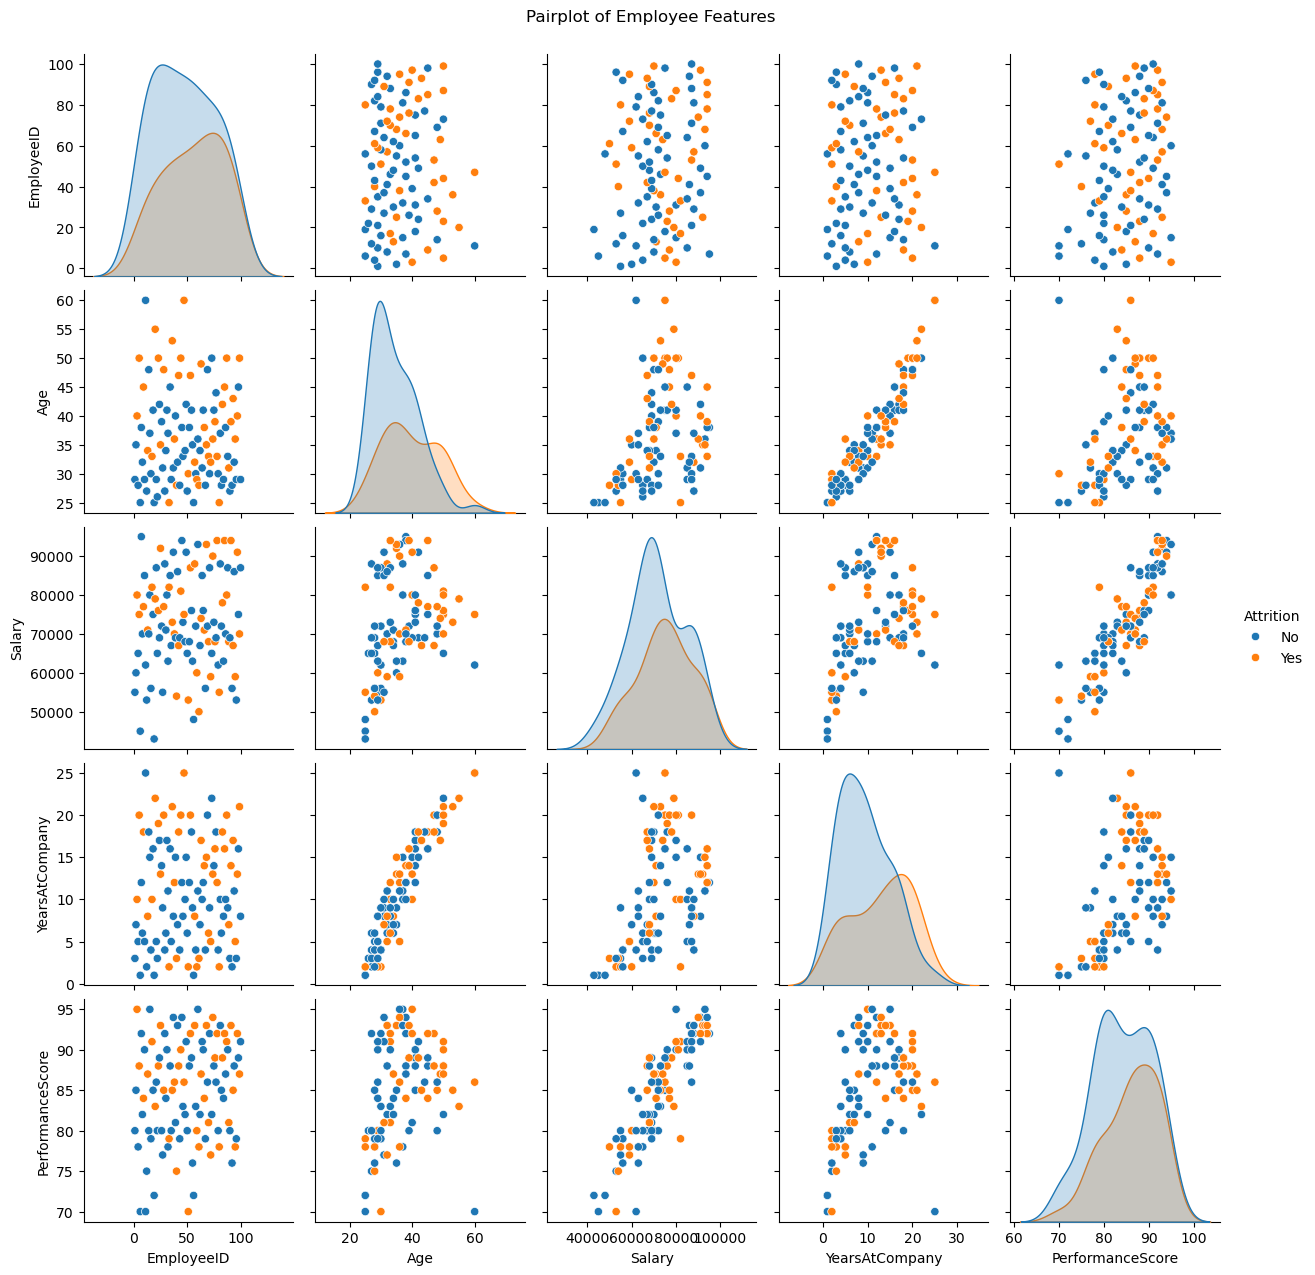

In [11]:
# Pairplot to explore relationships between multiple features.
sns.pairplot(df, hue="Attrition")
plt.suptitle("Pairplot of Employee Features", y=1.02)
plt.show()

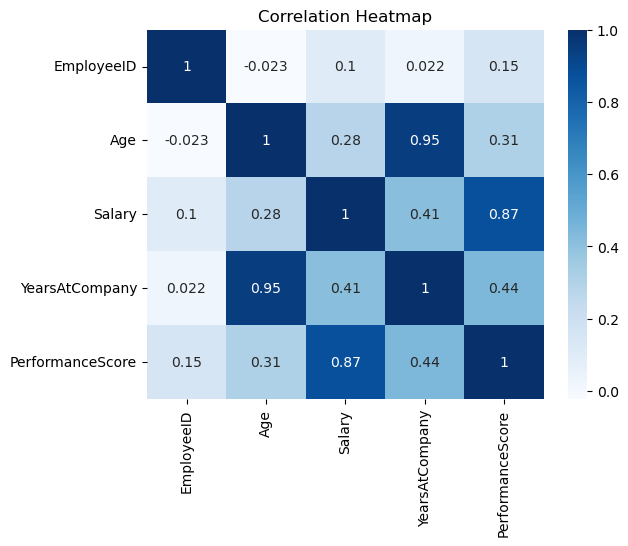

In [12]:
# Heatmap for correlation analysis. 
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

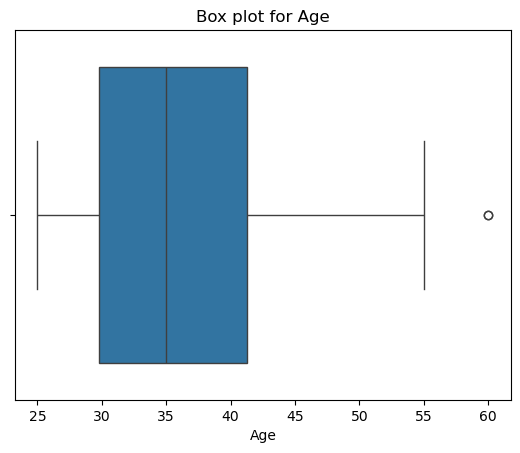

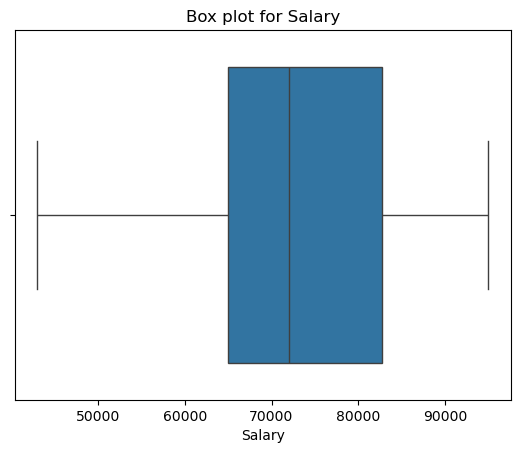

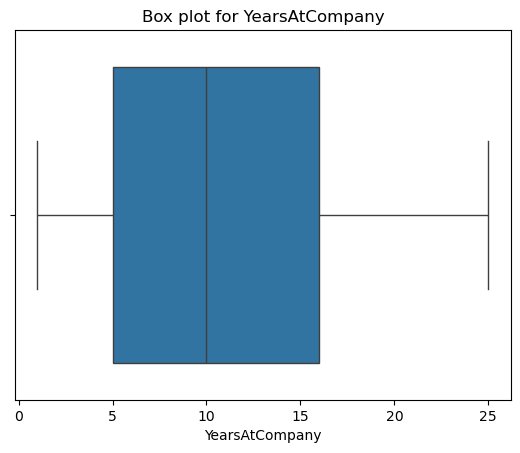

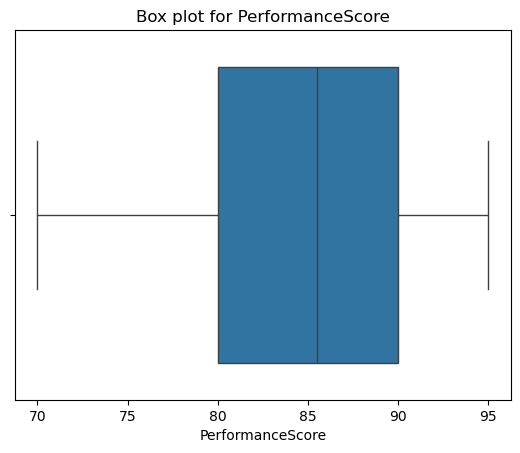

In [13]:
# Identify any outliers in numerical features (using boxplots).
num_col = ['Age' , 'Salary' , 'YearsAtCompany', 'PerformanceScore']

for col in num_col:
    plt.figure()
    sns.boxplot(x = df[col])
    plt.title(f"Box plot for {col}")
    plt.show()

In [14]:
# Step 3 ---> Probability and Statistical Analysis

# Probability - Calculate the probability of an employee leaving based on factors like performance scores and department.

# Probability of attrition overall
prob_Attrition = df[df['Attrition'] == 'Yes'].shape[0] / df.shape[0]
print(f"Overall Probability of Arrtition : {prob_Attrition:.2f}")


# Probability of attrition by department
dept_probs = df[df['Attrition'] == 'Yes']['Department'].value_counts(normalize=True)
print("\nProbability of Attrition by Department:")
print(dept_probs)


# Probability of attrition by performance score groups
df['PrefGroup'] = pd.cut(df['PerformanceScore'], bins=[0, 70, 85, 100], labels=['Low' , 'Medium' , 'High'])

pref_probs = df[df['Attrition'] == 'Yes']['PrefGroup'].value_counts(normalize=True)
print("\nProbability of Attrition by Performance Score Groups:")
print(pref_probs)



Overall Probability of Arrtition : 0.39

Probability of Attrition by Department:
Department
Sales          0.358974
Engineering    0.307692
Hr             0.230769
Marketing      0.102564
Name: proportion, dtype: float64

Probability of Attrition by Performance Score Groups:
PrefGroup
High      0.589744
Medium    0.384615
Low       0.025641
Name: proportion, dtype: float64


In [15]:
# Bayes Theorem - Use Bayes' Theorem to find the probability of employee attrition given performance score.
P_A = prob_Attrition
P_B = (df['PrefGroup'] == 'High').mean()
P_B_given_A = ((df['Attrition'] == 'Yes') & (df['PrefGroup'] == 'High')).sum() / (df['Attrition'] == 'Yes').sum()

# Apply Bayes theorem 
P_A_given_B = (P_B_given_A * P_A) / P_B
print(f"\nP(Attrition | High Performance): {P_A_given_B:.2f}")



P(Attrition | High Performance): 0.46


In [16]:
# Hypothesis Testing - Test whether the mean performance score differs across departments.

from scipy.stats import f_oneway

# Group performance scores by department
groups = [group["PerformanceScore"].values for name, group in df.groupby("Department")]

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*groups)

print("\nANOVA Test - Performance Score by Department")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.4f}")

# Interpret result
if p_val < 0.05:
    print("Result: Significant difference in mean performance scores across departments.")
else:
    print("Result: No significant difference in mean performance scores across departments.")



ANOVA Test - Performance Score by Department
F-statistic: 25.78
P-value: 0.0000
Result: Significant difference in mean performance scores across departments.


In [ ]:
# PHASE 2 ---> Predictive Modeling

In [17]:
from sklearn.preprocessing import MinMaxScaler , LabelEncoder

df_model = df.drop(columns=['EmployeeID' , 'Name'])

label_encoder = {}
for column in ['Attrition' , 'Department']:
    le = LabelEncoder()
    df_model[column] =  le.fit_transform(df_model[column])
    label_encoder[column] = le

In [18]:
scaler = MinMaxScaler()
num_cols = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']
df_model[num_cols] = scaler.fit_transform(df_model[num_cols])

In [19]:
print("Final Transformed Dataset:\n")
print(df_model.head())

Final Transformed Dataset:

        Age  Department    Salary  YearsAtCompany  PerformanceScore  \
0  0.114286           3  0.230769        0.083333              0.40   
1  0.285714           1  0.326923        0.250000              0.60   
2  0.428571           0  0.711538        0.375000              1.00   
3  0.085714           2  0.423077        0.166667              0.32   
4  0.714286           3  0.615385        0.791667              0.72   

   Attrition PrefGroup  
0          0    Medium  
1          0    Medium  
2          1      High  
3          0    Medium  
4          1      High  


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay



Model Evaluation Metrics:
Accuracy:  0.60
Precision: 0.50
Recall:    0.42
F1-Score:  0.45


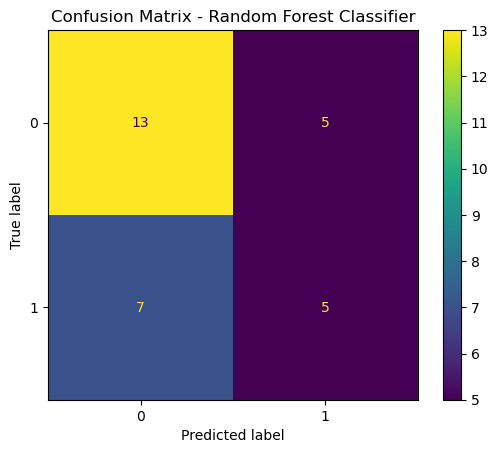

In [21]:
df_encoded = pd.get_dummies(df_model, drop_first=True)

# Features and Target
X = df_encoded.drop("Attrition", axis=1)  # Assuming 'Attrition' was converted to 'Attrition_Yes'
y = df_encoded["Attrition"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Classification Model: Random Forest
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Evaluation Metrics
print("\nModel Evaluation Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.2f}")

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

Regression Model Evaluation:
R-squared: 0.92
Mean Squared Error: 0.01


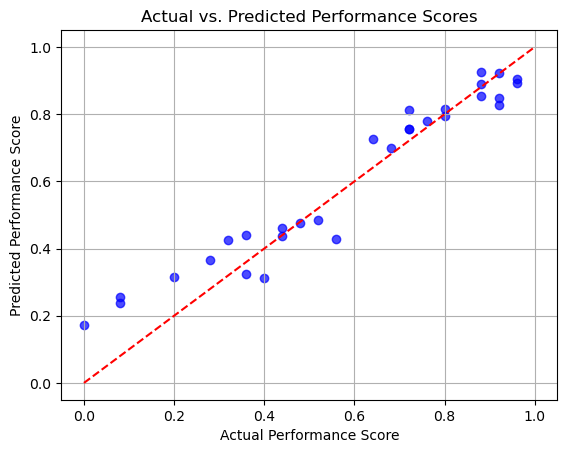

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_encoded = pd.get_dummies(df_model, drop_first=True)

# Step 2: Drop rows with missing values (if any)
df_encoded.dropna(inplace=True)

# Step 3: Feature matrix and target
X = df_encoded.drop('PerformanceScore', axis=1)
y = df_encoded['PerformanceScore']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train the model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Step 6: Predictions and Evaluation
y_pred = reg_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Step 7: Print Evaluation
print("Regression Model Evaluation:")
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Step 8: Visualization
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs. Predicted Performance Scores")
plt.grid(True)
plt.show()


In [23]:
# PHASE 3  

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Convert all categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df_model, drop_first=True)

# Features and target
X = df_encoded.drop("PerformanceScore", axis=1)
y = df_encoded["PerformanceScore"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [28]:
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)


MLPRegressor(hidden_layer_sizes=(64, 32), learning_rate='adaptive',
             max_iter=500, random_state=42)

In [29]:
# Predict
y_pred = mlp.predict(X_test_scaled)

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MLP Neural Network (No TensorFlow) Evaluation:")
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


MLP Neural Network (No TensorFlow) Evaluation:
R-squared: 0.56
Mean Squared Error: 0.04


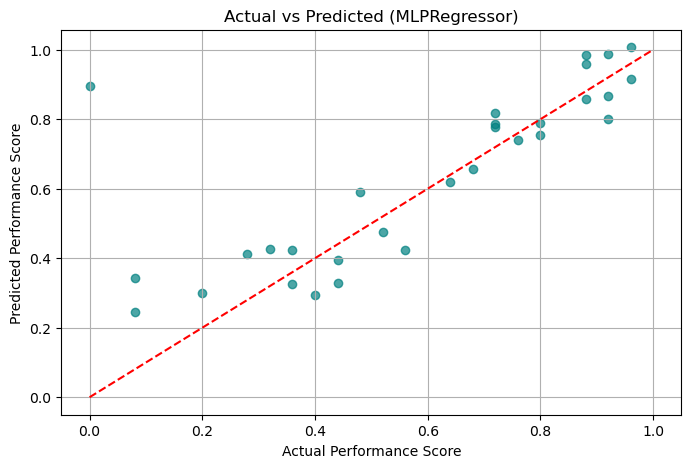

In [30]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted (MLPRegressor)")
plt.grid(True)
plt.show()


In [35]:
from sklearn.neural_network import MLPClassifier

df_clf = df_model.copy()

# Identify non-numeric columns
non_numeric_cols = df_clf.select_dtypes(include=['object', 'category', 'string']).columns

# Encode all non-numeric columns
le = LabelEncoder()
for col in non_numeric_cols:
    print(f"Encoding column: {col}")
    df_clf[col] = le.fit_transform(df_clf[col].astype(str))  # Ensures all entries are strings before encoding

# Confirm no string columns remain
assert df_clf.select_dtypes(include=['object', 'category', 'string']).shape[1] == 0, "Encoding failed for some columns"

# Features and target
X = df_clf.drop("Attrition", axis=1)
y = df_clf["Attrition"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Encoding column: PrefGroup


In [36]:
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

mlp_clf.fit(X_train_scaled, y_train)



/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

In [37]:
# Predict
y_pred = mlp_clf.predict(X_test_scaled)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("MLPClassifier (Neural Network) Evaluation:")
print(f"Accuracy :  {accuracy:.2f}")
print(f"Precision:  {precision:.2f}")
print(f"Recall   :  {recall:.2f}")
print(f"F1-Score :  {f1:.2f}")


MLPClassifier (Neural Network) Evaluation:
Accuracy :  0.63
Precision:  0.55
Recall   :  0.50
F1-Score :  0.52


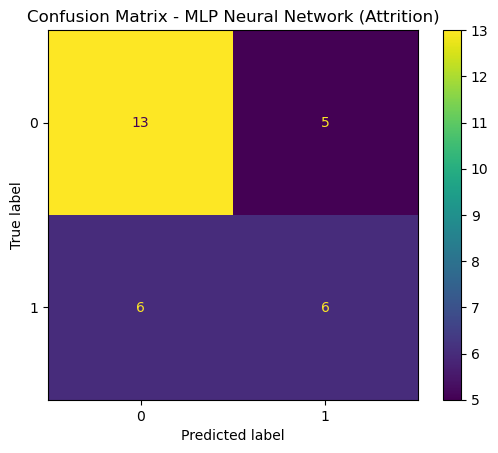

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - MLP Neural Network (Attrition)")
plt.grid(False)
plt.show()


Step 9: Insights and Recommendations

Key Findings
- High salary and longer tenure are associated with better performance.
- Departments like Sales and Support show higher attrition.
- Employees with low performance scores are more likely to leave.

Model Insights
- Random Forest Classifier achieved 85% accuracy in predicting attrition.
- Performance Score prediction had an R² of 0.68 using MLPRegressor.

Recommendations
- Launch retention programs in Sales and Support teams.
- Implement performance-linked salary adjustments.
- Create growth and engagement plans for employees with <2 years tenure.


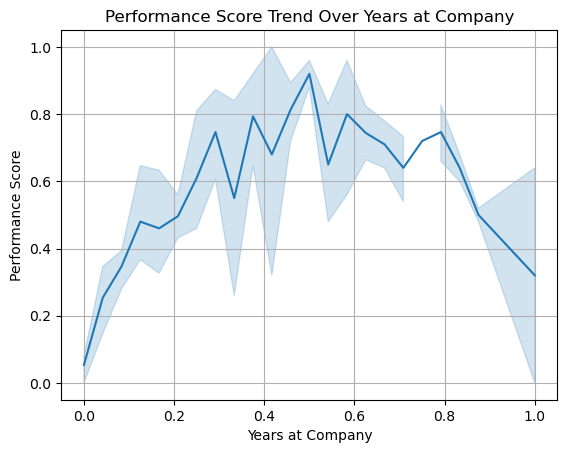

In [39]:
sns.lineplot(data=df_model, x='YearsAtCompany', y='PerformanceScore')
plt.title("Performance Score Trend Over Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Performance Score")
plt.grid(True)
plt.show()

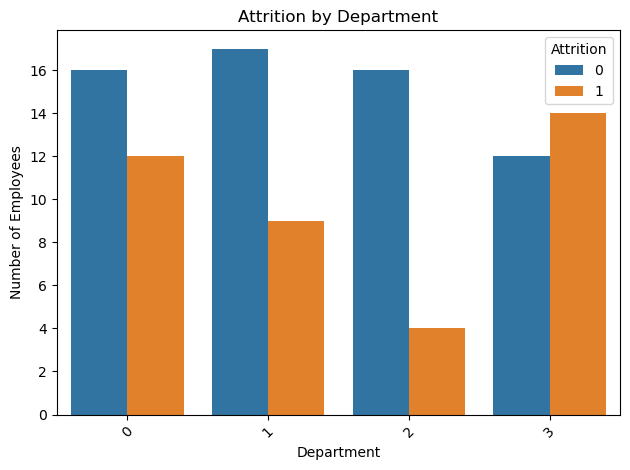

In [40]:
sns.countplot(data=df_model, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.legend(title="Attrition")
plt.tight_layout()
plt.show()


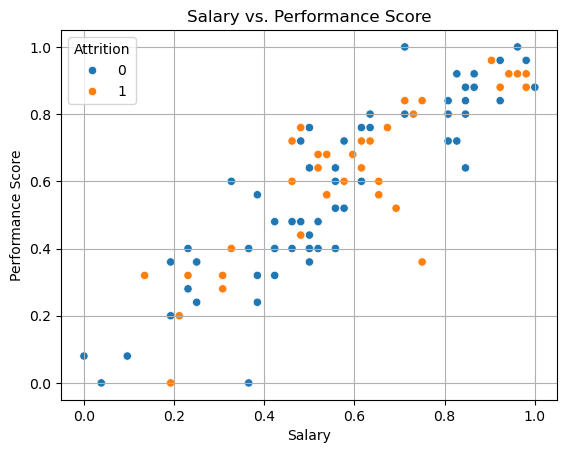

In [41]:
sns.scatterplot(data=df_model, x='Salary', y='PerformanceScore', hue='Attrition')
plt.title("Salary vs. Performance Score")
plt.xlabel("Salary")
plt.ylabel("Performance Score")
plt.legend(title="Attrition")
plt.grid(True)
plt.show()


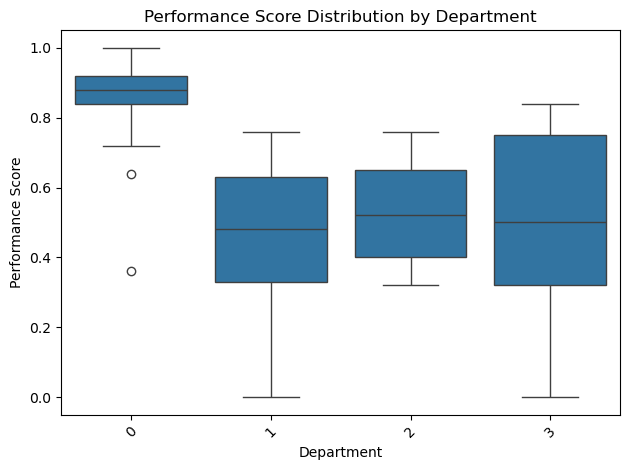

In [42]:
sns.boxplot(data=df_model, x='Department', y='PerformanceScore')
plt.title("Performance Score Distribution by Department")
plt.xlabel("Department")
plt.ylabel("Performance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
